In [1]:
import kagglehub
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt

2024-12-07 13:24:13.294490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = kagglehub.dataset_download("subho117/cat-and-dog-classification-using-cnn")
print("Path to dataset files:", path)

100%|██████████| 545M/545M [04:17<00:00, 2.22MB/s] 

Extracting files...


Path to dataset files: /Users/baiturtashbaev/.cache/kagglehub/datasets/subho117/cat-and-dog-classification-using-cnn/versions/1


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
import os

# Check the extracted dataset contents
print(os.listdir(path))


['dog-vs-cat']


In [6]:
dataset_directory = os.path.join(path, 'dog-vs-cat')

In [7]:
train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    dataset_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 25000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


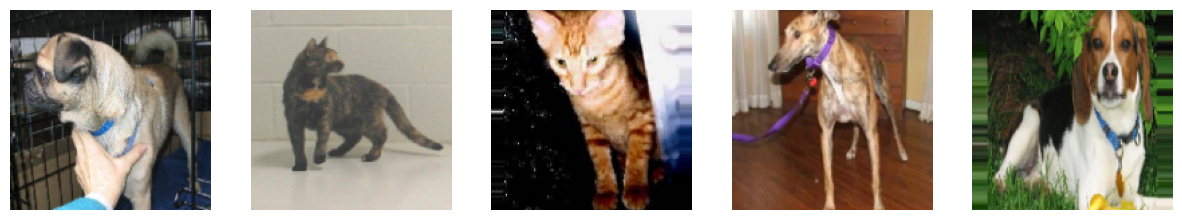

In [9]:
sample_images, sample_labels = next(train_generator)
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    ax[i].imshow(sample_images[i])
    ax[i].axis('off')
plt.show()

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/Users/baiturtashbaev/Documents/Байтур/5 semester/3colloqium/pythonProject/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
import os

# Check the contents of the main dataset folder
dataset_directory = os.path.join(path, 'dog-vs-cat')
print("Dataset directory:", dataset_directory)
print("Contents:", os.listdir(dataset_directory))

# Check the folder structure
train_path = os.path.join(dataset_directory, 'train')
validation_path = os.path.join(dataset_directory, 'validation')

# Verify if the directories exist
if os.path.exists(train_path):
    print("Train directory found:", os.listdir(train_path))
else:
    print("Train directory not found!")

if os.path.exists(validation_path):
    print("Validation directory found:", os.listdir(validation_path))
else:
    print("Validation directory not found!")


Dataset directory: /Users/baiturtashbaev/.cache/kagglehub/datasets/subho117/cat-and-dog-classification-using-cnn/versions/1/dog-vs-cat
Contents: ['cat', 'dog']
Train directory not found!
Validation directory not found!


In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/Users/baiturtashbaev/Documents/Байтур/5 semester/3colloqium/pythonProject/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.5889 - loss: 0.6821

ValueError: The PyDataset has length 0

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
model.save("dog_cat_classifier.h5")

In [ ]:
from keras.src.legacy.preprocessing import image
import numpy as np

test_image = image.load_img('dog4.jpeg', target_size=(200, 200))

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

i = 0
if (result >= 0.5):
    print("Dog")
else:
    print("Cat")